# Midterm T1 2017

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 150 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.
 
 The total score is 900 but you will be graded out of 0.9*900=810.

# Easy Stuff (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = \frac{1}{2-x}$$

In [2]:
# Working done on paper

taylor = lambda x: 1 + (x-1) + (x-1)**2

2) Use the Taylor series you found in 1) to find $$\frac{1}{0.8}$$ **along with bound on error**.

In [4]:
# For 1/0.8, we let x = 1.2

print("1/0.8 is roughly equal to " + str(taylor(1.2)))

# Error is worked out on paper,
# but the actual value of 1/0.8 could be anywhere from 1.24 to 1.24 + 0.0195...

1/0.8 is roughly equal to 1.24


### 2 Bisection (100)

We can find euler number $e$ by solving equation.

$\ln x = 1$




1) If we want to find $e$ by bisection with starting bound of [2,3], how many iteration do we need to get it acuurate to $10^{-6}$

In [ ]:
# 21 iterations (working done on paper)

2) Find $e$ that is accurate up to $10^{-6}$.

In [12]:
def bisect(func, ran, iterations):  # Bisection function
    low = min(ran)
    up = max(ran)
    mid = (up + low)/2
    for i in range(iterations):
        if func(up) * func(mid) < 0:
            low = mid
        else:
            up = mid
        mid = (up + low)/2
    return mid

print("Answer from bisection = " + str(bisect(lambda x: math.log(x) - 1, [2, 3], 21)))
print("Actual value for e    = " + str(math.e))

Answer from bisection = 2.7182819843292236
Actual value for e    = 2.718281828459045


### 3. Newton's method (100)

1) Find Newton's method update rule for solving

$\sin(x) + e^x + \cos(x) = 5$


In [92]:
def newton(f, start, n):  # Using Newton's method
    diff = lambda x: (f(x + 1e-6) - f(x - 1e-6)) / 2e-6
    for i in range(n):
        start = start - f(start)/diff(start)
    return start

2) Solve the above equation. Pick appropriate starting point.

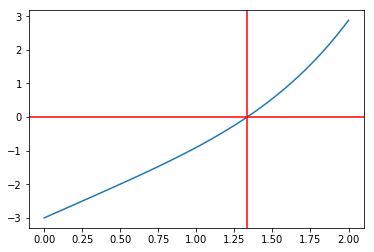

In [93]:
f = lambda x: math.sin(x) + math.exp(x) + math.cos(x) - 5

ans = newton(f, 1, 5)

xx = np.linspace(0, 2, 100)
plt.plot(xx, [f(x) for x in xx])
plt.axhline(0, color="red")
plt.axvline(ans, color="red")
plt.show()

3) Draw an example when Newton's method doesn't work.

In [94]:
# When you pick a bad initial point (too far away form answer) and the answer is unable to diverge to the actual solution

f_ex = lambda x: x**(1/5)  # The answer to this should be x = 0

print(newton(f_ex, 1, 5))  # But Newton's method breaks and gives some really big number (and somehow complex)

(-1024.000015776533+1.3588011318328894e-07j)


### 4. Derivative (100)

1) Plot the first and second derivative of $f(x) = e^{-x} \sin(x)$

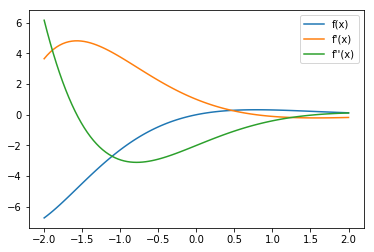

In [20]:
# First and second order derivatives
dx = lambda f, x, h=1e-5: (f(x+h) - f(x-h))/(2*h)
d2x = lambda f, x, h=1e-5: (f(x+h) - 2*f(x) + f(x-h))/(h**2)

f = lambda x: math.exp(-x) * math.sin(x)

xx = np.linspace(-2, 2, 100)
plt.plot(xx, [f(x)for x in xx], label="f(x)")
plt.plot(xx, [dx(f, x)for x in xx], label="f'(x)")
plt.plot(xx, [d2x(f, x)for x in xx], label="f''(x)")
plt.legend()
plt.show()

2) Which formula is better for approximating $f'(x)$. Answer with no justification recieve no credit.
$$
g_1(x) = \frac{f(x+h) - 4 f(x-h) + 3 f(x)}{6h}
$$

$$
g_2(x) = \frac{f(x+2h) - 3f(x-h) + 2f(x)}{5h}
$$

In [ ]:
# Answer is g2, working done on paper

### 5. Legendre (100)

1) Find Legendre Polynomial which passes through all these point.

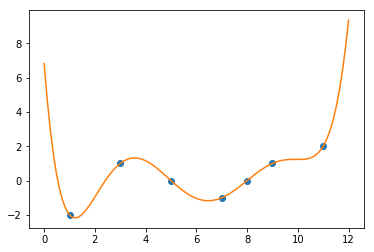

In [21]:
xs = np.array([1,3,5,7,8,9,11])
ys = np.array([-2.,1,0,-1,0,1,2])

# This function generates legendre polynomials (returns a function)
def legendre(xs, ys):
    def polynomial(x):
        sum = 0
        for i in range(len(xs)):
            ans = ys[i]
            for j in range(len(xs)):
                if i != j:
                    ans *= (x - xs[j]) / (xs[i] - xs[j])
            sum += ans
        return sum
    return polynomial

f = legendre(xs, ys)

plt.plot(xs, ys, 'o')
xx = np.linspace(0, 12, 100)
plt.plot(xx, [f(x) for x in xx])
plt.show()

### 6. Integral (100)

1) We want to calculate

$$\int_3^7 x^3 +1 \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [ ]:
# At least 4733 pieces (working on paper)

2) Use trapezoid rule to calculate
$$\int_3^7 x^3 + 1 \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.



In [154]:
# Wolfram's answer is 584

# This function integrates
def trapezium(func, start, end, num):
    ran = np.linspace(start, end, num+1)
    return (0.5 * (func(start) + func(end)) + sum([func(i) for i in ran[1:num]])) * ((end-start)/num)

f1 = lambda x: x**3 + 1
ans_int = trapezium(f1, 3, 7, 4000)
print("Integral = " + str(ans_int))

Integral = 584.00001


# Creative Stuff (It's actually easier than you think.)

### 7. The other Legendre Polynomial.

Legendre did so many things in the past sometimes we have name clash. This is a different one from what we learned in class. This Legendre Polynomial shows up many places in Physics, Engineering and data analysis. https://en.wikipedia.org/wiki/Legendre_polynomials

In the homework we did fourier series where we found we can approximate complex function as a sum of sine and cosine. We can do the same thing, but instead of using sine and cosine. We will be using (the other) Legendre Polynomail. Let us get started.

Legendre polynomial can be computed recursively by using the following recurrence formula:
$$
    P_0(x) = 1 \\
    P_1(x) = x
$$
and 
$$
    P_{n+1} = \frac{1}{n+1}\left[(2n+1)xP_n(x) - nP_{n-1}(x)\right]
$$
or equivalently(this is easier for coding)
$$
    P_{n} = \frac{1}{n}\left[ (2n-1) x P_{n-1}(x) - (n-1)P_{n-2}(x)\right]
$$

**Task 1** Write a function $P(x, n)$ which computes $P_n(x)$. Check your answer by plotting your $P(x, 4)$ against 
$$P_4(x) = \frac{1}{8}(35x^4-30x^2+3)$$ 
there are couple more for you to check given on wikipedia.

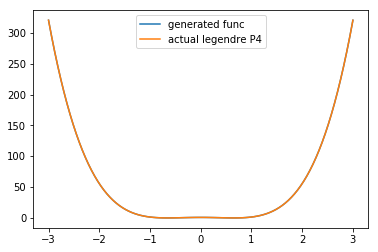

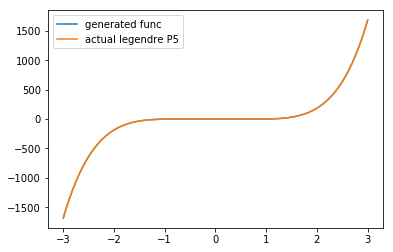

In [150]:
# This function generates Legendre polynomials (as a function)
def legendre_poly(n):
    def poly(x):
        if n == 0:
            return 1
        elif n == 1:
            return x
        else:
            polyn1 = legendre_poly(n-1)
            polyn2 = legendre_poly(n-2)
            return ((2*n-1)*x*polyn1(x) - (n-1)*polyn2(x))/n
    return poly

# Plot test 

l_poly4 = legendre_poly(4)
l_poly4_real = lambda x: (35*x**4 - 30*x**2 + 3)/8

xx = np.linspace(-3, 3, 100)
plt.plot(xx, [l_poly4(x) for x in xx], label="generated func")
plt.plot(xx, [l_poly4_real(x) for x in xx], label="actual legendre P4")
plt.legend()
plt.show()

l_poly5 = legendre_poly(5)
l_poly5_real = lambda x: (63*x**5 - 70*x**3 + 15*x)/8

plt.plot(xx, [l_poly5(x) for x in xx], label="generated func")
plt.plot(xx, [l_poly5_real(x) for x in xx], label="actual legendre P5")
plt.legend()
plt.show()

**Task 2** Legendre Polynomial has a very nice property that is
$$
\int_{-1}^{1} P_n(x)P_m(x) \; dx = \begin{cases} 
0 & \text{if }n\neq m \\
\frac{2}{2n+1} & \text{if } n = m
\end{cases}
$$

We know something about how to get computer to do integral. **Numerically show that this property is true for all pairs of n,m from 0 to 4.**

Clarification: Write a function that compute the right handside quickly and compare left and right hand side. Pick a suitable number of subdivision. They should be close enough.

In [151]:
allnm = [(i,j) for i in range(5) for j in range(5)]

for pairs in allnm:
    m = pairs[0]
    n = pairs[1]
    f = lambda x: legendre_poly(m)(x) * legendre_poly(n)(x)
    
    integral = trapezium(f, -1, 1, 1000)  # This function called is from previous question
    
    if m == n:
        assert(abs(integral - 2/(2*n+1)) <= 1e-4)
    else:
        assert(abs(integral) <= 1e-4)
    
    print("Integral between P_{0} and P_{1} is {2}.".format(m, n, round(integral, 4)))

Integral between P_0 and P_0 is 2.0.
Integral between P_0 and P_1 is 0.0.
Integral between P_0 and P_2 is 0.0.
Integral between P_0 and P_3 is 0.0.
Integral between P_0 and P_4 is 0.0.
Integral between P_1 and P_0 is 0.0.
Integral between P_1 and P_1 is 0.6667.
Integral between P_1 and P_2 is 0.0.
Integral between P_1 and P_3 is 0.0.
Integral between P_1 and P_4 is -0.0.
Integral between P_2 and P_0 is 0.0.
Integral between P_2 and P_1 is 0.0.
Integral between P_2 and P_2 is 0.4.
Integral between P_2 and P_3 is 0.0.
Integral between P_2 and P_4 is 0.0.
Integral between P_3 and P_0 is 0.0.
Integral between P_3 and P_1 is 0.0.
Integral between P_3 and P_2 is 0.0.
Integral between P_3 and P_3 is 0.2857.
Integral between P_3 and P_4 is 0.0.
Integral between P_4 and P_0 is 0.0.
Integral between P_4 and P_1 is -0.0.
Integral between P_4 and P_2 is 0.0.
Integral between P_4 and P_3 is 0.0.
Integral between P_4 and P_4 is 0.2222.


**Task 3** The property we learned in Task2 is called Orthorgornality. This is actually what make fourier series magic in the homework works. This means that we can also write a complex function as a sum of Legendre Polynomials just as we did with sine and cosine in homework.

$$
    f(x) = a_0 P_0(x) + a_1 P_1(x) + a_2 P_2(x) + a_3 P_3(x) + a_4 P_4(x) + \ldots
$$

where

$$
    a_i = \frac{2i+1}{2}\int_{-1}^{1} f(x) P_i(x) dx
$$
(Bonus:(0.0000000001 Point) Prove the above formula.)

For example, an approximation of triangle function using sum of Legendre Polynomial for triangle function is shown below.
![Triangle Aproximation](leg_series.png)

**Your job: Find all the coefficient and make the plot above**

Note: up to P20 one may take a while so do up to P5 and P10 and make sure you get it right first.

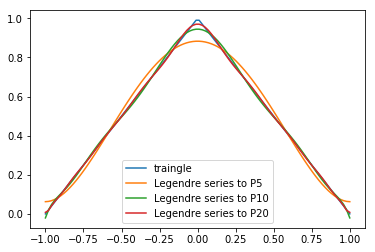

In [110]:
# Takes about a minute to run the whole thing

triangle = lambda x: 1 - abs(x)

# This function is to find the coefficient in front of each polynomial
find_coeff = lambda f, leg, n: (2*n + 1) * trapezium(lambda x: f(x) * leg(x), -1, 1, 1000) / 2

def plot_legendre(f, n, xx):  # Takes in the list of domain, returns a list of the values of the func for x in domain
    lst = np.zeros(len(xx))
    for num in range(n+1):
        leg = legendre_poly(num)
        coeff = find_coeff(triangle, leg, num)
        for i in range(len(xx)):
            lst[i] += coeff * leg(xx[i])
    return lst

xx = np.linspace(-1, 1, 100)
plt.plot(xx, [triangle(x) for x in xx], label="traingle")
plt.plot(xx, plot_legendre(triangle, 5, xx), label="Legendre series to P5")
plt.plot(xx, plot_legendre(triangle, 10, xx), label="Legendre series to P10")
plt.plot(xx, plot_legendre(triangle, 20, xx), label="Legendre series to P20")
plt.legend()
plt.show()

### 8 Ply's Buffet Restaurant. (150)

Since it's late evening and I know you are hungry. Let's do a problem about food.

Ply apple shop business is doing very well so he expands his business line to Shabu Shabu Buffet called Meme Shabu since he know how to maximize the profit using Poisson distribution. Let us assume that the number of people who wants to eat at his restaurant each day also follows poisson distribution $P(x; \lambda)$.

It's not practical to determine how many days he sell off his buffet like in his apple shop since the food can go over a day. But Ply need to find some other method to determine the parameter $\lambda$ which he can use to improve his business.

Luckily Meme Shabu has a restaurant rating card which *every customer* fills. The rating goes from 5 to 0 stars and the nature of rating customer gives goes as follow
 - First 50 people for that day will always give 5 stars(each). Since they got good service
 - Next 50 people, will give 4 stars(each).
 - Next 50 peole, will give 3 stars(each).
 - Next 50 peole, will give 2 stars(each).
 - Next 50 peole, will give 1 stars(each).
 - The rest will either give 0 star(since they didn't receive service).
 
For example, if there are 157 people who wants to eat at Meme Shabu. The total number of star would be $50*5 + 50*4 + 50*3 + 7*2$. It goes like tax bracket you did in programming 1.

Ply found that on average the **total** number of stars his Shabu restaurant gets is 500 stars. **Find $\lambda$.**

Lambda = 116.75169133681695


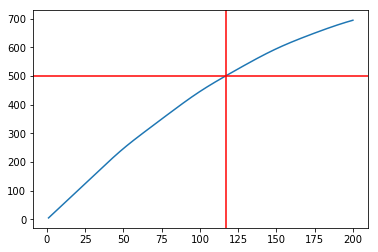

In [148]:
poisson = lambda k, lmb: math.exp((k * math.log(lmb) - lmb) - math.lgamma(k + 1))

# Finds total stars given n customers
def total_stars(n):
    ans = 0
    for i in range(5, 0, -1):
        if n <= 50:
            ans += n * i
            break
        else:
            ans += 50 * i
            n -= 50
    return ans

# Finds extected stars for given lambda
def avg_stars(lmb):
    avg_stars = 0
    prob = 1
    for n in range(250):
        avg_stars += poisson(n, lmb) * total_stars(n)
        prob -= poisson(n, lmb)
    avg_stars += prob * total_stars(n)
    return avg_stars


# We want avg_stars(lmb) = 500, so we try to find a condition which fit this

f2 = lambda lmb: avg_stars(lmb) - 500
lmb_final = newton(f2, 100, 5)
print("Lambda = " + str(lmb_final))

xx = np.linspace(1, 200, 1000)
plt.plot(xx, [avg_stars(x) for x in xx])
plt.axvline(lmb_final, color="red")
plt.axhline(500, color="red")